In [1]:
import cv2
from  matplotlib import pyplot as plt

In [2]:
########## a number of tracker dictionaries that maps strings to their#####
##########corresponding OpenCV object tracker implementations ###########
Tracker_dict = {'csrt':cv2.TrackerCSRT_create,                
                'kcf':cv2.TrackerKCF_create,
                'boosting': cv2.TrackerBoosting_create,
                'mil': cv2.TrackerMIL_create,
                'medianflow': cv2.TrackerMedianFlow_create,
                'mosse': cv2.TrackerMOSSE_create}

In [3]:
###### to detect multiple objects , multiple trackers are used here
trackers = cv2.MultiTracker_create()  

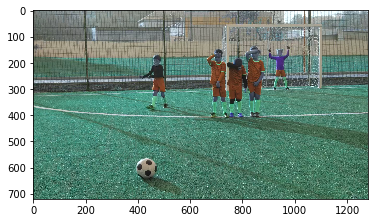

In [4]:
video= cv2.VideoCapture(r'football_video.mp4')
# reading frames from the video
ret, frame = video.read()
cv2.imshow('frame',frame)
plt.imshow(frame)
plt.show()

In [5]:
######## to track k number objects , initialising a varible k with any value
k=3                
for i in range(k):
    cv2.imshow('Frame',frame)
    #### select the bounding box of the object we want to track
    boundingbox = cv2.selectROI('Frame',frame)
    tracker = Tracker_dict['csrt']()
    #### create a new object tracker for the bounding box and add it trackers
    trackers.add(tracker, frame, boundingbox)

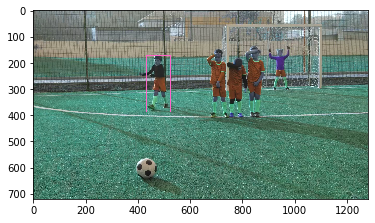

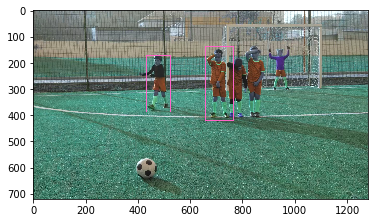

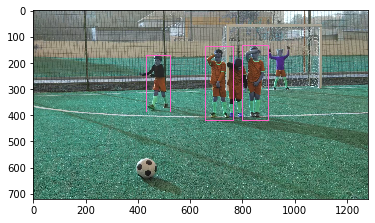

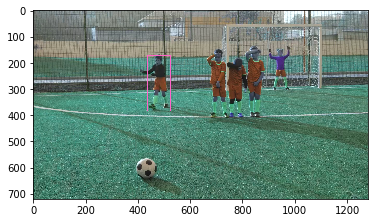

In [ ]:
# loop over frames from the video #######   
while True:
    ret, frame = video.read()
    if not ret:
        break
    ##### grab the updated bounding box coordinates (if any) for each
    ##### object that is being tracked
    (success, boxes)=trackers.update(frame)

    ##### loop over the bounding boxes and draw then on the frame
    for box in boxes:
        (x,y,w,h) = [int(a) for a in box]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,100,200),2)
        cv2.imshow('Frame',frame)
        plt.imshow(frame)
        plt.show()
        key = cv2.waitKey(10) & 0xFF  # hexadecimal representation of 8 times 1 and shortcut of getting least significant 8 bits of this 32 bit integer
        if key == ord('q'):
            break
            

In [ ]:
video.release()
cv2.destroyAllWindows()     # close all windows